#                  ADS PROJECT  - HEART STROKE PREDICTION

### SUBMITTED BY 
######       RAIMA ROJ - 222BDA10
######       ARYA S - 222BDA40
######       ANN MARIA JOY - 222BDA47                     

In [1]:
# Importing the necessary packages

import pandas as pd               
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import missingno as msno

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the dataset

df =pd.read_csv("train_strokes.csv")      

In [3]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [4]:
# There are 43,400 rows and 12 columns in our dataset.

df.shape 

(43400, 12)

In [5]:
# Concise summary of the dataset is understood.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
# Computed the summary statistics of the our dataset.

df.describe()                               

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


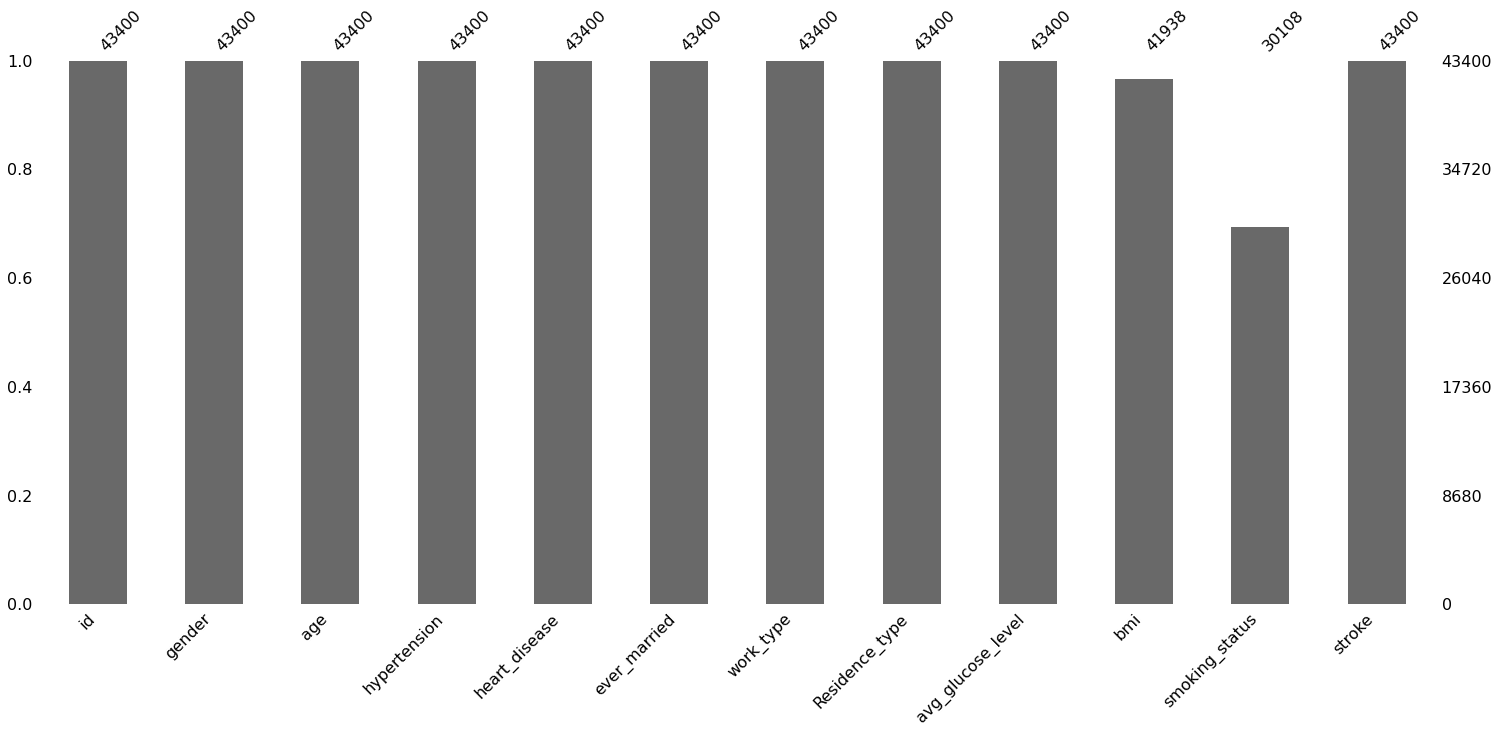

In [7]:
# This gives the bar chart that visualizes missing values.
# It can be clearly seen that bmi and smoking_status has significant amount of missing values.

msno.bar(df)       
plt.show()         

### OR

In [8]:
# Similar to the previous cell, another method to find the total number no. of missing values for each column.

df.isnull().sum()         

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [9]:
# Dropped the'id' column because it is irrelevant for our problem and does not convey any information.

df=df.drop(['id'],axis=1)       

In [10]:
df['bmi'].unique()

array([18. , 39.2, 17.6, 35.9, 19.1, 50.1, 17.7, 27. , 32.3, 54.6, 35. ,
       22. , 39.4, 26.1, 42.4, 33. , 19.7, 22.5, 24.6, 25.2, 41.8, 60.9,
       31.5, 27.3, 23.7, 24.5, 28.4, 26.9, 26.7, 31.2, 25. , 25.4, 27.5,
       16. , 31.6, 25.1, 30.9, 24.8, 23.4, 29.4, 18.3, 20. , 19.5, 36. ,
       27.7, 28.5, 26.8, 33.6, 29.1, 34.9, 35.3, 26.4, 40.1, 43.1, 36.7,
       29.3, 21.2, 36.6, 21.4, 27.9, 34.3, 31. , 38.7, 27.6, 16.5, 22.8,
       35.4, 24.3, 25.7, 21.9,  nan, 38.4, 30.5, 25.9, 54.7, 29.9, 18.6,
       27.1, 24.9, 19.4, 29. , 48.2, 34.6, 25.8, 27.2, 20.7, 30. , 37.3,
       34.1, 23.6, 39.5, 23.5, 23.3, 64.8, 28.1, 24.4, 29.8, 35.1, 43.6,
       21. , 47.3, 16.6, 37.5, 24.2, 21.6, 31.1, 15.5, 20.5, 35.6, 16.7,
       41.9, 16.4, 17.1, 29.2, 37.9, 32.5, 44.6, 33.2, 22.3, 39.6, 37.8,
       40.3, 41.5, 41.6, 23.8, 39. , 23.2, 18.9, 36.1, 36.3, 40.5, 46.5,
       16.8, 46.6, 26.2, 35.2, 20.9, 36.8, 34.4, 22.2, 13.8, 31.7, 34.2,
       36.9, 31.9, 31.8, 29.5, 28.8, 28.9, 15.3, 37

<AxesSubplot:>

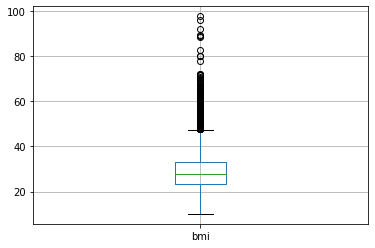

In [11]:
# Observed that there are outliers in 'bmi' using boxplot.
# Therefore,we found the median to fill the missing values.

df.boxplot('bmi')

In [12]:
med=df['bmi'].median()
df['bmi'].fillna(med,inplace=True)

In [13]:
# Found the unique values in the column 'smoking_status'.

df['smoking_status'].unique() 

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [14]:
# Observed there are quite a few nan values in this feature.
# So we grouped those values into another category called 'not known'.

df['smoking_status'].fillna('not known', inplace=True) 
df['smoking_status'].value_counts()          

never smoked       16053
not known          13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [15]:
df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [16]:
# We observed that there are very less values in the category 'other' so we dropped it.

df=df[df['gender']!='Other']

In [17]:
df.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
# We normalised the below mentioned columns since we noticed that,
# there is a significant difference in range of values in the these columns.

df['age']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
df['avg_glucose_level']=(df['avg_glucose_level']-df['avg_glucose_level'].min())/(df['avg_glucose_level'].max()-df['avg_glucose_level'].min())
df['bmi']=(df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43389 non-null  object 
 1   age                43389 non-null  float64
 2   hypertension       43389 non-null  int64  
 3   heart_disease      43389 non-null  int64  
 4   ever_married       43389 non-null  object 
 5   work_type          43389 non-null  object 
 6   Residence_type     43389 non-null  object 
 7   avg_glucose_level  43389 non-null  float64
 8   bmi                43389 non-null  float64
 9   smoking_status     43389 non-null  object 
 10  stroke             43389 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


### EXPLORATORY DATA ANALYSIS

<AxesSubplot:ylabel='stroke'>

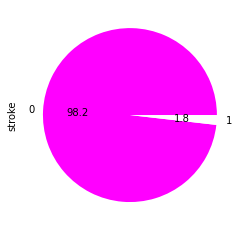

In [20]:
# For visualizing the frequency of our dependent variable that is stroke, we used pie chart.
# There are 2 outcomes for this feature 0 and 1 which gives the likelihood of getting stroke.
# This is an inbalanced dataset as we observe that the people who got stroke is very less compared to those who do not have stroke.

df.groupby('stroke').size().plot(kind='pie', autopct='%.1f',label='stroke',colors=['magenta','white'])

<AxesSubplot:xlabel='gender', ylabel='count'>

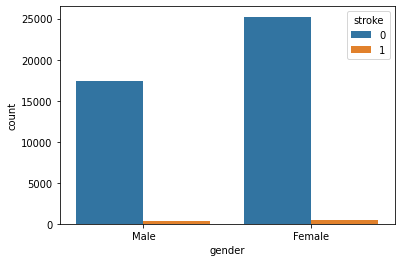

In [21]:
# We used countplot to depict how many have and not have stroke based on gender.
# Observation-the no of females is more than no of males for both cases and we observe that gender by itself is not enough to predict the chance of getting stroke.

sns.countplot(data=df,x='gender',hue='stroke',palette='tab10')

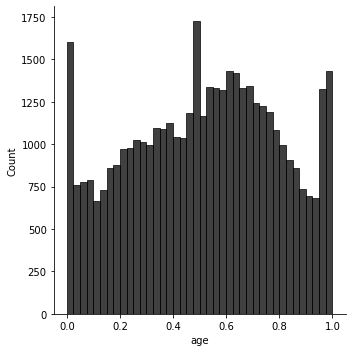

In [22]:
# We used distplot to represent the age distribution in our dataset.

sns.displot(df['age'],color='black')

<AxesSubplot:xlabel='stroke', ylabel='age'>

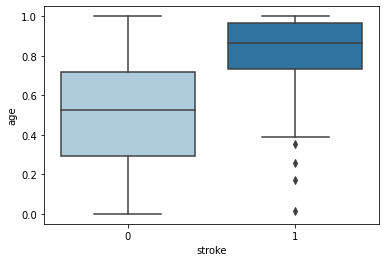

In [23]:
# We used boxplot to show how age and stroke are related.
# Observation- people of 60 years and more likely to have stroke. Although we can see some outliers among people below 30 years,
# it can be noted that people in the age group 30-70 are less likely to get stroke.

sns.boxplot(data=df,x='stroke',y='age',palette='Paired')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

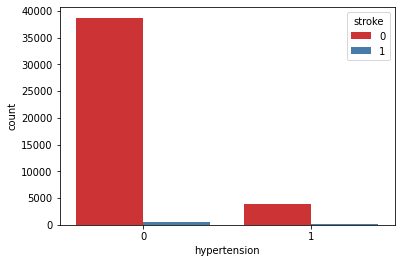

In [24]:
# We used countplot to show the count of patients who have hypertension.

sns.countplot(data=df,x='hypertension',hue='stroke',palette='Set1')

<AxesSubplot:xlabel='stroke', ylabel='hypertension'>

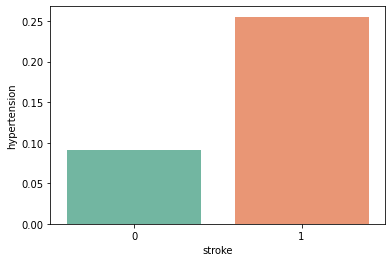

In [25]:
# Used barplot to show the relation between stroke and hypertension.
# Observation-it can be seen that as hypertension increases chance of getting stroke also increases.

sns.barplot(data=df,x='stroke',y='hypertension',ci=None,palette='Set2')

<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>

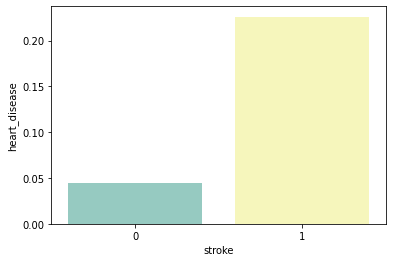

In [26]:
# Visualizing heart disease and stroke.
# Observation- As the 'heart disease' increases the probability of an individual getting stroke also increases.

sns.barplot(data=df,x='stroke',y='heart_disease',ci=None,palette='Set3')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

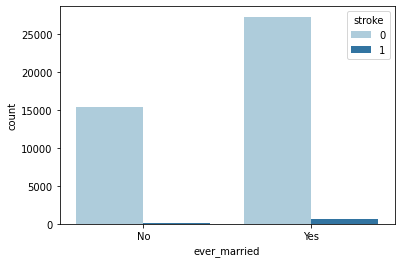

In [27]:
# Observation - People who are married have a higher stroke rate compared to those who are not.

sns.countplot(data=df,x='ever_married',hue='stroke',palette='Paired')

<AxesSubplot:xlabel='work_type', ylabel='count'>

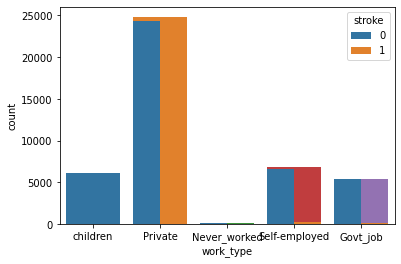

In [28]:
# Observation - We notice that people working in the Private sector have a higher probability of getting a stroke.
# And people who have never worked have a very less stroke rate.

# Above code will return unique values of attributes and its count
sns.countplot(data=df,x='work_type')
# Above code will create a count plot
sns.countplot(data=df,x='work_type',hue='stroke')
# Above code will create a count plot with respect to stroke

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

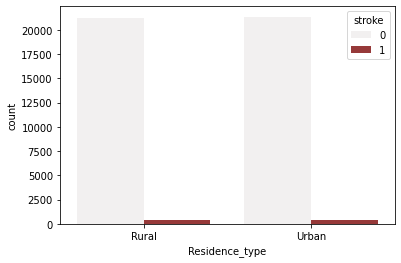

In [29]:
# Residence Type with respect to stroke.
# Observation - we cannot see much difference between the likelihood of getting stoke,
# between people of both rural and urban residence type. Hence this feature is not very useful.

sns.countplot(data=df,x='Residence_type',hue='stroke',color='brown')

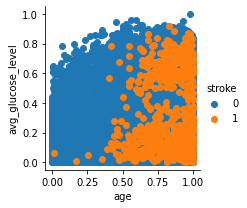

In [30]:
# Used scatter plot to find if combination of the variables age and avg_glucose_level has any impact on stroke.
# Observation- Having more age increases chances of getting stroke.
# We can see that almost all the yellow spots are after 40. 
# However, it is worth noting that a lot of the blue spots are also present after 40.

sns.FacetGrid(df,hue='stroke').map(plt.scatter,'age','avg_glucose_level').add_legend()

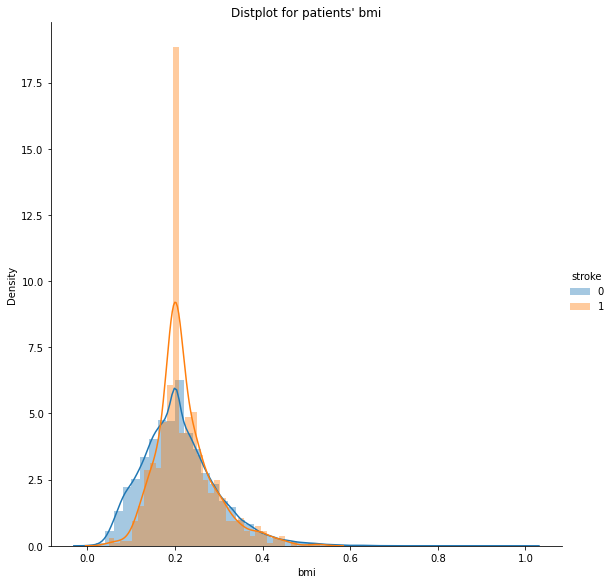

In [31]:
# Used distplot for showing the patient's bmi.
# Observation- People with bmi in the range 0.1-0.3 has higher chance of getting stroke.
# Also the bmi column alone cannot be used to predict the likelihood of a stroke.

sns.FacetGrid(df, hue="stroke", height = 8).map(sns.distplot, "bmi").add_legend()
plt.title("Distplot for patients' bmi")
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

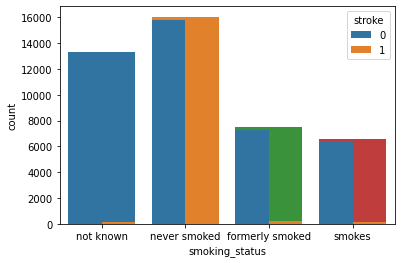

In [32]:
# Observation - smoking_status is also not a good indicator by itself of whether the patient is likely to get a stroke.

sns.countplot(data=df,x='smoking_status')
# Count plot of smoking status
sns.countplot(data=df,x='smoking_status',hue='stroke')
# Smoking Status with respect to Stroke

In [33]:
df.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         25234
        1           431
Male    0         17372
        1           352
Name: stroke, dtype: int64

In [34]:
df.groupby(["smoking_status"])["stroke"].value_counts()

smoking_status   stroke
formerly smoked  0          7266
                 1           221
never smoked     0         15767
                 1           284
not known        0         13145
                 1           145
smokes           0          6428
                 1           133
Name: stroke, dtype: int64

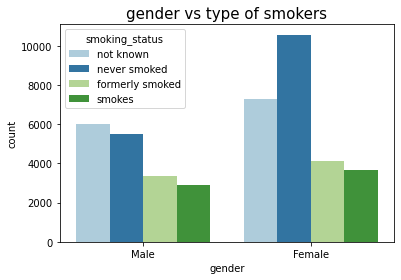

In [35]:
# Used countplot to show gender vs type of smokers.
# Observation- In our data, the number of females who regularly smokes and have never smoked are more compared to males. 

sns.countplot(x=df["gender"], hue=df["smoking_status"],palette='Paired')
plt.title("gender vs type of smokers", fontsize=15)
plt.show()

In [36]:
# we converted the following categorical values to numerical values using replace function

In [37]:
df['smoking_status']=df['smoking_status'].replace({'never smoked' : 0,'formerly smoked' : 1,'smokes' : 2,'not known' : 3})

In [38]:
df['ever_married']=df['ever_married'].replace({'Yes' : 1,'No' : 0})

In [39]:
df['Residence_type']=df['Residence_type'].replace({'Rural' : 0,'Urban' : 1})

In [40]:
df['gender']=df['gender'].replace({'Male' : 0, 'Female' : 1})

In [41]:
df['work_type']=df['work_type'].replace({'children' : 0,'Private' : 1,'Never_worked' : 2,'Self-employed' : 3,'Govt_job' : 4})

In [42]:
# calulated the correlation of each features with the dependent variable 'stroke'.

df.corr() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.027676,-0.024005,-0.082353,0.031073,0.036716,-0.001587,-0.035815,0.022338,-0.089128,-0.011324
age,0.027676,1.000000,0.272167,0.250191,0.693049,0.452533,0.001282,0.237633,0.350193,-0.300206,0.156050
hypertension,-0.024005,0.272167,1.000000,0.119761,0.176572,0.108411,-0.003132,0.160191,0.151365,-0.096951,0.075322
heart_disease,-0.082353,0.250191,0.119761,1.000000,0.128832,0.079235,-0.002748,0.146925,0.051751,-0.018994,0.113756
ever_married,0.031073,0.693049,0.176572,0.128832,1.000000,0.367792,0.004344,0.153609,0.336179,-0.251704,0.071917
work_type,0.036716,0.452533,0.108411,0.079235,0.367792,1.000000,-0.003745,0.095072,0.244334,-0.219512,0.045948
Residence_type,-0.001587,0.001282,-0.003132,-0.002748,0.004344,-0.003745,1.000000,0.000030,-0.003813,-0.000009,0.002244
avg_glucose_level,-0.035815,0.237633,0.160191,0.146925,0.153609,0.095072,0.000030,1.000000,0.181928,-0.066372,0.078908
bmi,0.022338,0.350193,0.151365,0.051751,0.336179,0.244334,-0.003813,0.181928,1.000000,-0.226644,0.016071
smoking_status,-0.089128,-0.300206,-0.096951,-0.018994,-0.251704,-0.219512,-0.000009,-0.066372,-0.226644,1.000000,-0.023252


### OR

Text(0.5, 1.0, 'Correlation Heatmap')

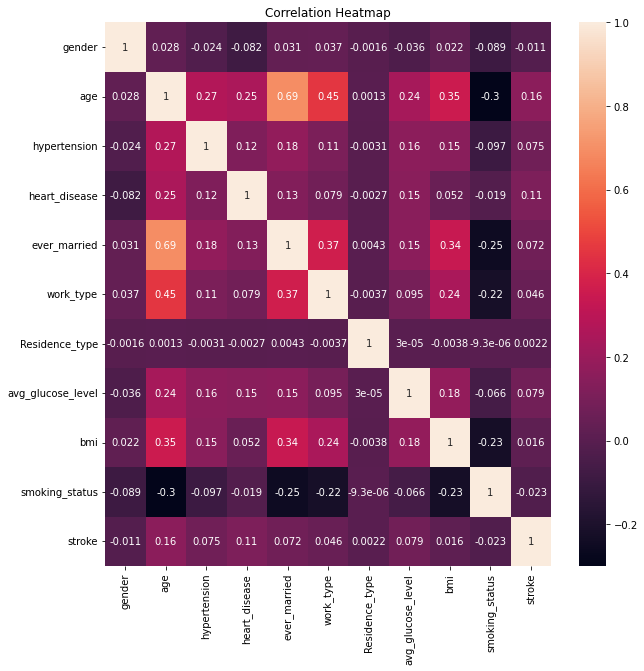

In [43]:
# Similarly done, using heatmap.

fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmax=1, annot=True,ax = ax)
heatmap.set_title('Correlation Heatmap')

### HYPOTHESIS TESTING

####  a) T-TEST 

In [44]:
# Grouped the categorical and numerical columns separately.

cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
num_cols = ['age', 'avg_glucose_level', 'bmi']

In [45]:
# Storing our alpha value in the variable.

ALPHA = 0.05

In [46]:
# Null hypothesis, H0: The dependent variable 'stroke' and other independent features are related (or dependent)
# Alternative hypothesis, H1:  The dependent variable 'stroke' and other independent features are not related (or not dependent)

In [47]:
# We have perfromed t-test on stroke with the feature 'avg_glucose_level' 
# and we can clearly see that the p-value we get is less than the alpha value, hence rejecting the null hypothesis.  
# This clearly implies that the different avg_glucose_level distribution does affect the likelihood of getting a stroke.

x, y = df[df.stroke==1].avg_glucose_level, df[df.stroke==0].avg_glucose_level

t, p = stats.ttest_ind(x, y, equal_var=False)
t, p = round(t, 5), round(p, 5)

if p <= ALPHA:
    print(f'Since p = {p} < {ALPHA}, reject H0, different avg_glucose_level distributions between "Stroke" and "No stroke" (t={t}, p={p})')
else:
    print(f'Since p = {p} > {ALPHA}, fail to reject H0, same avg_glucose_level distributions between "Stroke" and "No stroke" (t={t}, p={p}).')

Since p = 0.0 < 0.05, reject H0, different avg_glucose_level distributions between "Stroke" and "No stroke" (t=11.91651, p=0.0)


In [48]:
# Similarly, for the column 'bmi', from the testing, we can understand that the various various bmi values has a say in the predicition of stroke.

x, y = df[df.stroke==1].bmi, df[df.stroke==0].bmi

t, p = stats.ttest_ind(x, y, equal_var=False)
t, p = round(t, 5), round(p, 5)

if p <= ALPHA:
    print(f'Since p = {p} < {ALPHA}, reject H0, different BMI distributions between Stroke and "No stroke" (t={t}, p={p})')
else:
    print(f'Since p = {p} > {ALPHA}, fail to reject H0, same BMI distributions between Stroke and "No stroke" (t={t}, p={p}).')

Since p = 1e-05 < 0.05, reject H0, different BMI distributions between Stroke and "No stroke" (t=4.37377, p=1e-05)


In [49]:
# We performed the test also for the feature 'age', since it is driving factor in the prediction of stroke.
# As expected, we observe that different age distributions does affect the occurance of stroke.

x, y = df[df.stroke==1].age, df[df.stroke==0].age

t, p = stats.ttest_ind(x, y, equal_var=False)
t, p = round(t, 5), round(p, 5)

if p <= ALPHA:
    print(f'Since p = {p} < {ALPHA}, reject H0, different Age distributions between Stroke and "No stroke" (t={t}, p={p})')
else:
    print(f'Since p = {p} > {ALPHA}, fail to reject H0, same Age distributions between Stroke and "No stroke" (t={t}, p={p}).')

Since p = 0.0 < 0.05, reject H0, different Age distributions between Stroke and "No stroke" (t=58.23705, p=0.0)


In [50]:
t_test_df = pd.DataFrame(columns=['cat_cols', 'num_cols', 'alpha', 't', 'p'])

for col in num_cols:
    t, p = stats.ttest_ind(df.loc[df.stroke==0, col],
                            df.loc[df.stroke==1, col],
                            equal_var=False)
    t, p = round(t, 3), round(p, 5)
    t_test_df = t_test_df.append({'cat_cols': 'stroke', 'num_cols': col,
                    'alpha': ALPHA, 't': t, 'p': p}, ignore_index=True)

t_test_df['H0'] = t_test_df.p.apply(lambda x: 'Rejected' if x <= ALPHA else 'Fail to reject')
t_test_df['relation'] = t_test_df.H0.apply(lambda x: 'Different' if x =='Rejected' else 'Same')
def color_fail_to_rej(value):
    if value in ('Fail to reject', 'Same'):
        return 'color:green'
    else:
        return 'cmap: Blues'
t_test_df.style.background_gradient(cmap = 'Blues').applymap(color_fail_to_rej)

,cat_cols,num_cols,alpha,t,p,H0,relation
0,stroke,age,0.050000,-58.237000,0.000000,Rejected,Different
1,stroke,avg_glucose_level,0.050000,-11.917000,0.000000,Rejected,Different
2,stroke,bmi,0.050000,-4.374000,0.000010,Rejected,Different


##### b) ONE-WAY ANOVA TEST

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#observation - we observe that the p-value of all the features is less than the calculated f-statistic value,
#hence drawing a conclusion of rejecting the null hypothesis.

# Perform one-way ANOVA
model = ols('stroke ~ avg_glucose_level + age + bmi', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Printing the ANOVA table
print(anova_table)

                       sum_sq       df           F         PR(>F)
avg_glucose_level    1.757454      1.0  102.059509   5.727313e-24
age                 16.995165      1.0  986.949534  3.141854e-214
bmi                  1.636055      1.0   95.009569   1.997855e-22
Residual           747.085039  43385.0         NaN            NaN


In [52]:
# splitted  dependent variable and independent variables
# splitted our data into training and testing datasets

from sklearn.model_selection import train_test_split  
X= df.drop('stroke',axis=1)
Y= df['stroke']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.25)

#####  Naive Bayes classifier 

In [53]:
# Fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(X_train,Y_train)

GaussianNB()

In [54]:
# Predicting the Test set results
Y_pred=Gnb.predict(X_test)

In [55]:
# Calculating the accuracy score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(Y_test,Y_pred)

0.9122418879056047

In [56]:
# Evaluated the performance of the model using key metrics
report=classification_report(Y_pred,Y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      9970
           1       0.32      0.08      0.12       878

    accuracy                           0.91     10848
   macro avg       0.62      0.53      0.54     10848
weighted avg       0.87      0.91      0.89     10848



#####  Random Forest Classifier

In [57]:
# Fitting the data and training the model,similar to the precious classifier.
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train, Y_train)

RandomForestClassifier()

In [58]:
ypred = rclf.predict(X_test)

In [59]:
accuracy_score(Y_test,ypred)

0.9805494100294986

In [60]:
rep=classification_report(ypred,Y_test)
print(rep)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10843
           1       0.00      0.00      0.00         5

    accuracy                           0.98     10848
   macro avg       0.50      0.49      0.50     10848
weighted avg       1.00      0.98      0.99     10848

